# Importing Libraries

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
import sys
!{sys.executable} -m pip install kagglehub

  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
! pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datasnaek/mbti-type")

print("Path to dataset files:", path)

100%|██████████| 24.4M/24.4M [00:06<00:00, 4.17MB/s]

Extracting files...


Path to dataset files: C:\Users\Prakriti\.cache\kagglehub\datasets\datasnaek\mbti-type\versions\1


In [20]:
dataset_path = r"C:\Users\Prakriti\.cache\kagglehub\datasets\datasnaek\mbti-type\versions\1\mbti_1.csv"
data = pd.read_csv(dataset_path)

# Exploring our dataset

In [21]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [22]:
data.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [23]:
data.sample(5)

,type,posts
7538,INTP,"'The Bible, especially and including accounts ..."
6520,INTP,'You notice that a good number of responses he...
5223,INFJ,"'Dear K, You make me want to want. And to op..."
6415,INTJ,'Mine sounds really similar to yours then. We ...
8612,ENTJ,You tell him! Christ. I do wanna thank everyo...


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [26]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'It has been too long since I have been on per...
freq,1832,1


In [27]:
data.isnull().sum()

type     0
posts    0
dtype: int64

In [29]:
data.shape

(8675, 2)

In [31]:
data['type'].value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

In [33]:
type_counts = data['type'].value_counts().reset_index()
type_counts.columns = ['type','count']

# Visualization - before preprocessing

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_18108\3636299190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='count',data=type_counts, palette="husl")


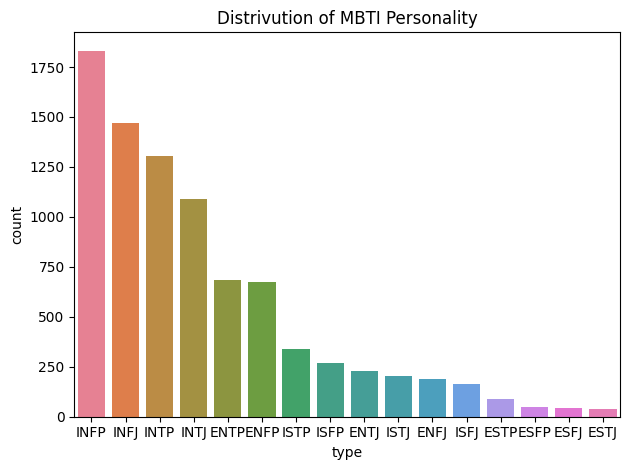

In [59]:
plt.Figure(figsize=(12,12))
sns.barplot(x='type', y='count',data=type_counts, palette="husl")
plt.title("Distrivution of MBTI Personality")
plt.tight_layout()

In [ ]:
# role = ['Analyst', 'Diplomat', 'Sentinal', 'Explorer']

mbti_to_role = {
    **{t: 'Analyst' for t in ['INTJ', 'INTP', 'ENTJ', 'ENTP']},
    **{t: 'Diplomat' for t in ['INFJ', 'INFP', 'ENFJ', 'ENFP']},
    **{t: 'Sentinel' for t in ['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ']},
    **{t: 'Explorer' for t in ['ISTP', 'ISFP', 'ESTP', 'ESFP']},
}

data['role'] = data['type']

In [55]:
data['role'] = data['type'].map(mbti_to_role)

In [56]:
role_counts = data['role'].value_counts().reset_index()
role_counts.columns = ['role','count']

In [64]:
import sys
!{sys.executable} -m pip install squarify

  Using cached squarify-0.4.4-py3-none-any.whl.metadata (600 bytes)
Using cached squarify-0.4.4-py3-none-any.whl (4.1 kB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Prakriti\AppData\Local\Temp\ipykernel_18108\568843110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'role', y = 'count', data = role_counts, palette='viridis')


Text(0, 0.5, 'count')

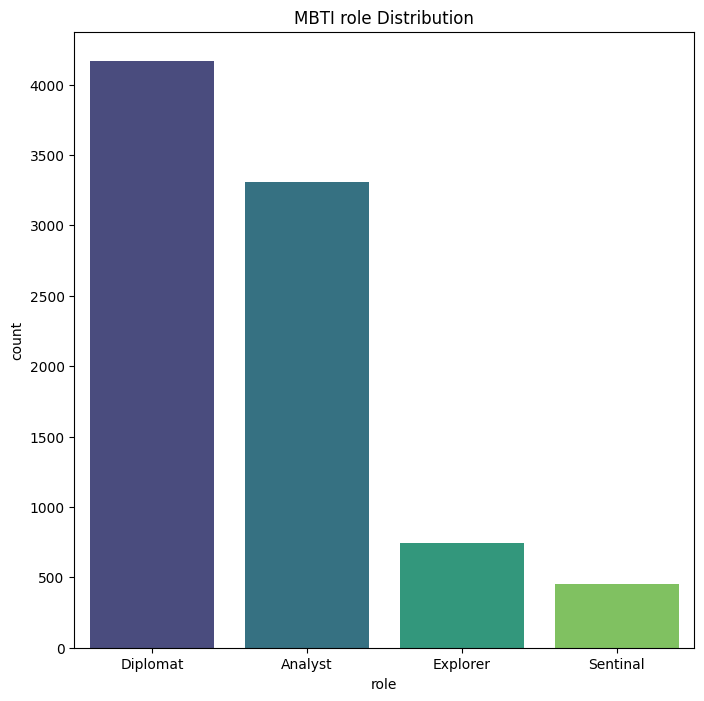

In [71]:
# Donut chart to show the role proportions
plt.figure(figsize=(8, 8))
sns.barplot(x = 'role', y = 'count', data = role_counts, palette='viridis')

plt.title('MBTI role Distribution')
plt.xlabel('role')
plt.ylabel('count')

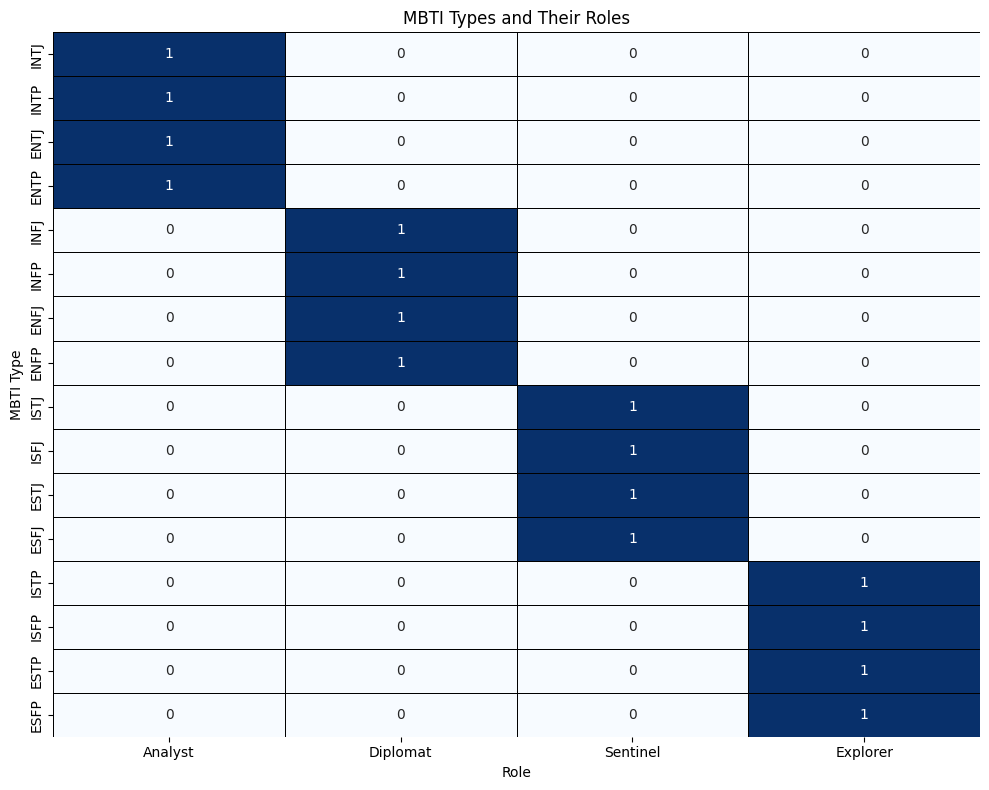

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the mapping
mbti_to_role = {
    'INTJ': 'Analyst', 'INTP': 'Analyst', 'ENTJ': 'Analyst', 'ENTP': 'Analyst',
    'INFJ': 'Diplomat', 'INFP': 'Diplomat', 'ENFJ': 'Diplomat', 'ENFP': 'Diplomat',
    'ISTJ': 'Sentinel', 'ISFJ': 'Sentinel', 'ESTJ': 'Sentinel', 'ESFJ': 'Sentinel',
    'ISTP': 'Explorer', 'ISFP': 'Explorer', 'ESTP': 'Explorer', 'ESFP': 'Explorer',
}

# Define roles
roles = ['Analyst', 'Diplomat', 'Sentinel', 'Explorer']

# Create a list of MBTI types
mbti_types = list(mbti_to_role.keys())

# Initialize a DataFrame with 0s
role_matrix = pd.DataFrame(0, index=mbti_types, columns=roles)

# Fill in the matrix with 1 where the MBTI type belongs to that role
for mbti_type, role in mbti_to_role.items():
    role_matrix.loc[mbti_type, role] = 1

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(role_matrix, annot=True, cmap='Blues', cbar=False, fmt='d', linewidths=0.5, linecolor='black')

# Customize the plot
plt.title('MBTI Types and Their Roles')
plt.xlabel('Role')
plt.ylabel('MBTI Type')
plt.tight_layout()
plt.show()


# Preprocessing

In [74]:
import re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
def preprocessing(text):
    text = re.sub(r'https\S+|www.\S+',' ',text)
    text = re.sub(r'^[a-z\s]', '', text)
    tokens = text.split()
    tokens = [ps.stem(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_posts'] = data['posts'].apply(preprocessing)

NameError: name 'stop_words' is not defined